<a href="https://colab.research.google.com/github/gugyeoj1n/Natural_Language_Processing/blob/main/08_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ["먹고 싶은 치킨", "먹고 싶은 피자", "햄버거 크고 아름다운 햄버거", "저는 음식이 좋아요"]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

print(len(tokenizer.word_index))
# count : 단어가 등장한 횟수
# binary : 단어의 등장 여부
# tfidf : TF-IDF
# freq : 단어가 등장한 횟수 / 문장의 단어 개수
print(tokenizer.texts_to_matrix(texts, mode='count'), end="\n\n")
print(tokenizer.texts_to_matrix(texts, mode='binary'), end="\n\n")
print(tokenizer.texts_to_matrix(texts, mode='tfidf').round(2), end="\n\n")
print(tokenizer.texts_to_matrix(texts, mode='freq').round(2), end="\n\n")

10
[[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]

[[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]

[[0.   0.85 0.85 0.   1.1  0.   0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.   0.   1.1  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.86 0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]

[[0.   0.33 0.33 0.   0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.   0.   0.33 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]



dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
train sample :  11314
target :  20
    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


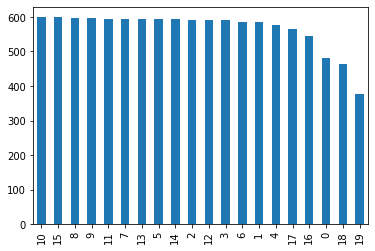

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

newsdata = fetch_20newsgroups(subset='train')
print(newsdata.keys())
print("train sample : ", len(newsdata.data))
print("target : ", len(newsdata.target_names))

data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)

data['target'].value_counts().plot(kind='bar')

print(data.groupby('target').size().reset_index(name='count'))

In [ ]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email, train_label = data['email'], data['target']
test_email, test_label = newsdata_test.data, newsdata_test.target

vocab_size = 10000
num_classes = 20

def data_preprocs(train_data, test_data, mode) :
  tokenizer = Tokenizer(num_words = vocab_size)
  tokenizer.fit_on_texts(train_data)
  x_train = tokenizer.texts_to_matrix(train_data, mode=mode)
  x_test = tokenizer.texts_to_matrix(test_data, mode=mode)

  return x_train, x_test, tokenizer.index_word

x_train, x_test, index_to_word = data_preprocs(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

print(index_to_word[1], index_to_word[9999])

the mic
